In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_data_example.csv')
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
df

,SaleDate,ProductID,QuantitySold,SaleAmount
0,2023-10-03,45,7,645.351342
1,2023-02-11,48,18,3490.849674
2,2023-07-28,1,8,606.531562
3,2023-09-26,4,3,247.557093
4,2023-06-17,4,17,2533.733015
...,...,...,...,...
195,2023-07-29,14,11,439.834600
196,2023-01-24,8,19,1700.297705
197,2023-12-03,25,4,273.591969
198,2023-09-23,16,15,1781.457249


In [3]:
# Identify top 5 best-selling products
top_products = df.groupby('ProductID')['QuantitySold'].sum().sort_values(ascending=False).head(5)
print("Top 5 Best-Selling Products:\n", top_products)

Top 5 Best-Selling Products:
 ProductID
12    90
14    80
1     76
4     67
17    62
Name: QuantitySold, dtype: int64


In [4]:
# Classifying data into weekdays and weekends
df['DayType'] = df['SaleDate'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df

,SaleDate,ProductID,QuantitySold,SaleAmount,DayType
0,2023-10-03,45,7,645.351342,Weekday
1,2023-02-11,48,18,3490.849674,Weekend
2,2023-07-28,1,8,606.531562,Weekday
3,2023-09-26,4,3,247.557093,Weekday
4,2023-06-17,4,17,2533.733015,Weekend
...,...,...,...,...,...
195,2023-07-29,14,11,439.834600,Weekend
196,2023-01-24,8,19,1700.297705,Weekday
197,2023-12-03,25,4,273.591969,Weekend
198,2023-09-23,16,15,1781.457249,Weekend


In [5]:
# Average sales on weekdays vs weekends
average_sales = df.groupby('DayType')['SaleAmount'].mean()
print("\nAverage Sales - Weekdays vs. Weekends:\n", average_sales)


Average Sales - Weekdays vs. Weekends:
 DayType
Weekday     961.055543
Weekend    1024.610594
Name: SaleAmount, dtype: float64


In [6]:
# T-test to compare sales amounts
weekend_sales = df[df['DayType'] == 'Weekend']['SaleAmount']
weekday_sales = df[df['DayType'] == 'Weekday']['SaleAmount']
t_stat, p_val = ttest_ind(weekend_sales, weekday_sales, equal_var=False)
print("\nT-test result: T-statistic =", t_stat, ", P-value =", p_val)


T-test result: T-statistic = 0.4464956975849217 , P-value = 0.6563402995591798


If the P-value is low, it would suggest that the difference in sales between these two types of days is statistically significant.

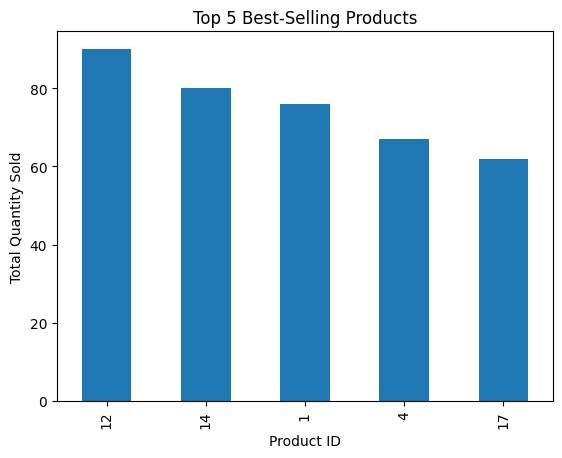

In [7]:
# Plotting top 5 products
top_products.plot(kind='bar')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()

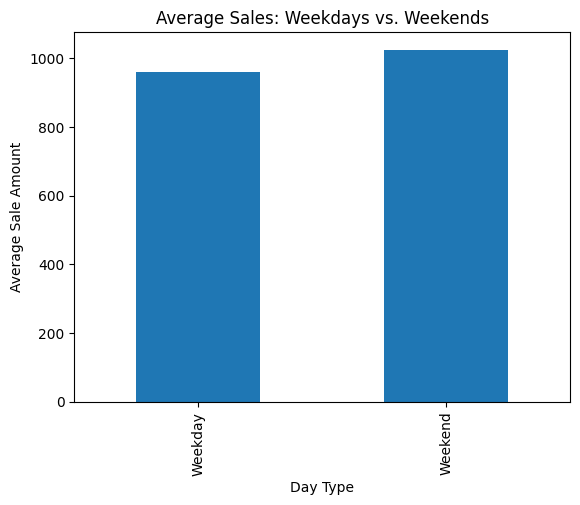

In [8]:
# Plotting average sales
average_sales.plot(kind='bar')
plt.title('Average Sales: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Sale Amount')
plt.show()